ITD_VARIABILLITIES_OVER_WEST_AFRICA
=
===========================================================================

----

In [42]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib as mpl
from scipy import stats as st
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy import feature as cf
from cartopy.feature import BORDERS
from matplotlib.gridspec import GridSpec
from cartopy.io.img_tiles import StamenTerrain
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [43]:
ds_dewpoint = xr.open_dataset('E:/DATASETS/ERA5/2m_Dewpoint_1991_2020.nc')
ds_dewpoint

<xarray.Dataset>
Dimensions:    (latitude: 65, longitude: 137, time: 8640)
Coordinates:
  * longitude  (longitude) float32 -17.0 -16.75 -16.5 -16.25 ... 16.5 16.75 17.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... 4.75 4.5 4.25 4.0
  * time       (time) datetime64[ns] 1991-01-01 ... 2020-12-01T23:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 08:57:33 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

grouping by month and season
---

In [48]:
mon_dewpoint = ds_dewpoint.groupby('time.month').mean()
sea_dewpoint = ds_dewpoint.groupby('time.season').mean()

convert from Kel to Cel
---

In [49]:
def celsius(data):
    C = data -273.15
    return C

In [50]:
mon_dewpoint_c = celsius(mon_dewpoint)
sea_dewpoint_c = celsius(sea_dewpoint)

In [51]:
sea_dewpoint_c

<xarray.Dataset>
Dimensions:    (latitude: 65, longitude: 137, season: 4)
Coordinates:
  * longitude  (longitude) float32 -17.0 -16.75 -16.5 -16.25 ... 16.5 16.75 17.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... 4.75 4.5 4.25 4.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    d2m        (season, latitude, longitude) float32 13.130524 ... 21.076874

In [31]:
#mon_dewpoint_c

ITD_POSITION
---

In [67]:
def ITD_dewpoint(data):
    I = data.where(data > 15)
    II = I.where(I< 17)
    
    return II

mon_itd = ITD_dewpoint(mon_dewpoint_c)
sea_itd = ITD_dewpoint(sea_dewpoint_c)

In [68]:
dewpoint_itd_mon = mon_itd.d2m
dewpoint_itd_sea = mon_itd.d2m

MONTHLY DATA
=

In [69]:
jan = dewpoint_itd_mon[0]
feb = dewpoint_itd_mon[1]
mar = dewpoint_itd_mon[2]
apr = dewpoint_itd_mon[3]
may = dewpoint_itd_mon[4]
jun = dewpoint_itd_mon[5]
jul = dewpoint_itd_mon[6]
aug = dewpoint_itd_mon[7]
sep = dewpoint_itd_mon[8]
octt = dewpoint_itd_mon[9]
nov = dewpoint_itd_mon[10]
dec = dewpoint_itd_mon[11]

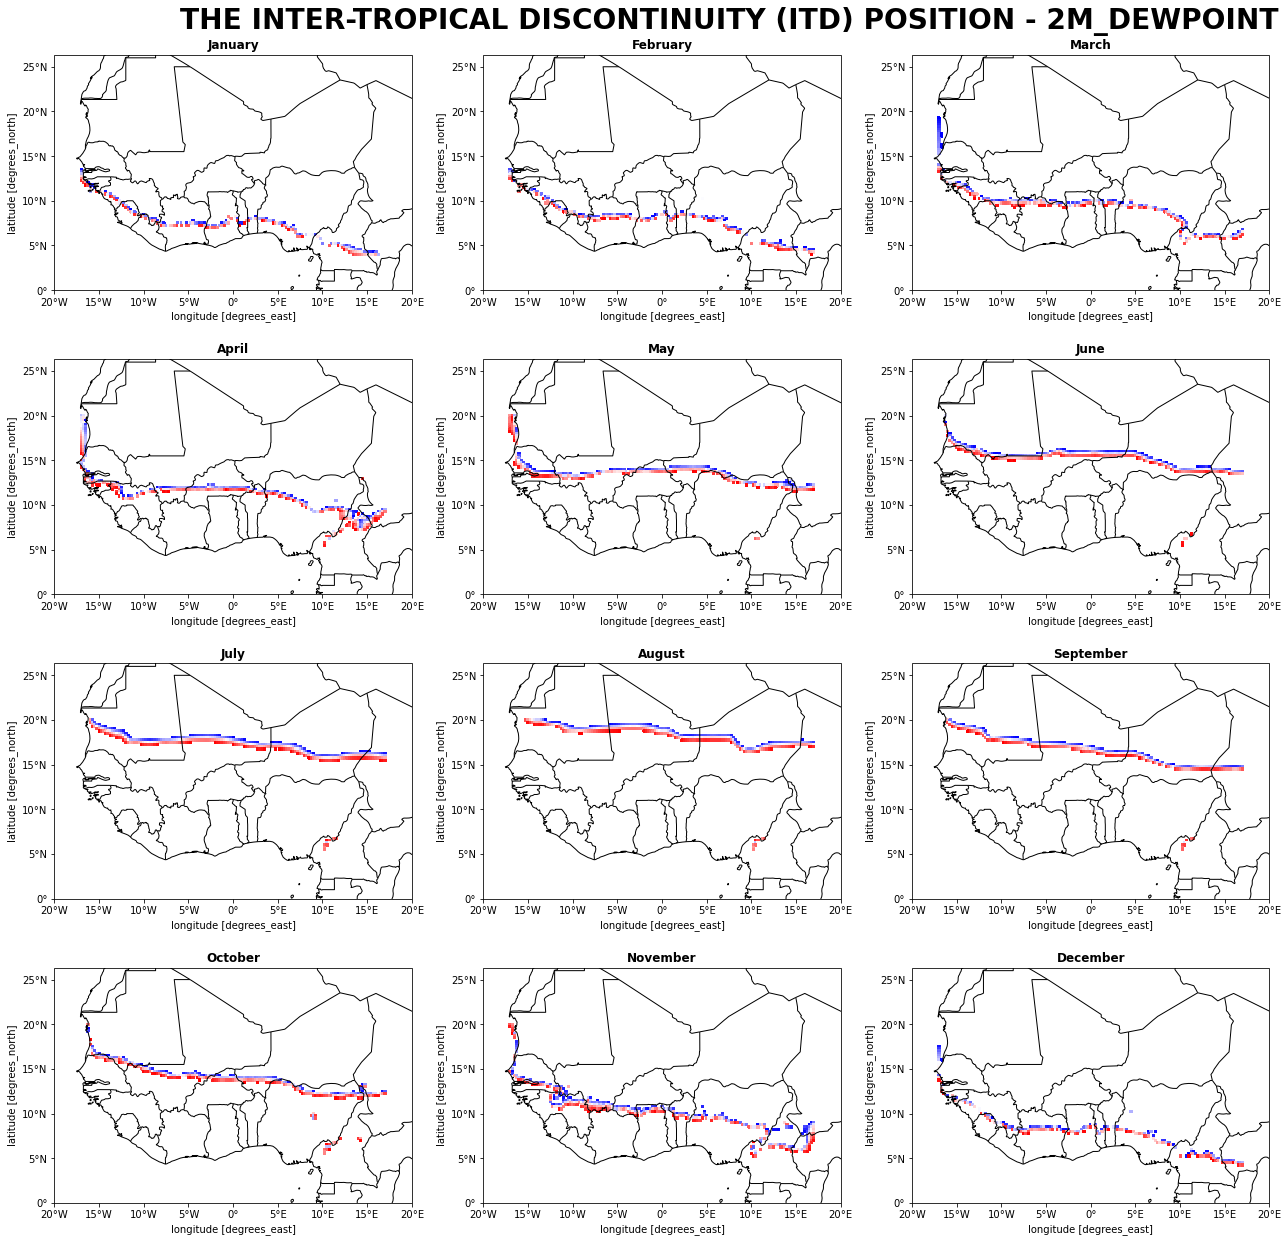

In [82]:
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw = dict(projection = ccrs.PlateCarree()), figsize=(25,18), sharex = False)
plt.subplots_adjust(bottom=0.05, right=0.8, top=0.95)
for axis in axes:
    for ax in axis:
        ax.coastlines()
        ax.add_feature(cf.BORDERS)
        ax.set_extent([-20, 20, 0,25])
        ax.set_xticks([-20,-15,-10,-5,0,5,10,15,20])
        ax.set_yticks([25,20,15,10,5,0], crs=ccrs.PlateCarree())
    
        lon_formatter = LongitudeFormatter()
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        
fig.suptitle('THE INTER-TROPICAL DISCONTINUITY (ITD) POSITION - 2M_DEWPOINT', fontsize =28, fontweight = 'bold')        
        
jan.plot(cmap='bwr', ax = axes[0,0], add_colorbar = False)#, 
axes[0,0].set_title('January',fontweight = 'bold')
########################################
feb.plot(cmap='bwr', ax = axes[0,1],add_colorbar = False)#, 
axes[0,1].set_title('February',fontweight = 'bold')
#######################################
mar.plot(cmap='bwr', ax = axes[0,2], add_colorbar = False)#, 
axes[0,2].set_title('March',fontweight = 'bold')
#######################################
apr.plot(cmap='bwr', ax = axes[1,0], add_colorbar = False)#, 
axes[1,0].set_title('April',fontweight = 'bold')
#######################################
may.plot(cmap='bwr', ax = axes[1,1], add_colorbar = False)#, 
axes[1,1].set_title('May',fontweight = 'bold')
#######################################
jun.plot(cmap='bwr', ax = axes[1,2], add_colorbar = False)#, 
axes[1,2].set_title('June',fontweight = 'bold')
#######################################
jul.plot(cmap='bwr', ax = axes[2,0], add_colorbar = False)#, 
axes[2,0].set_title('July',fontweight = 'bold')
#######################################
aug.plot(cmap='bwr', ax = axes[2,1], add_colorbar = False)#, 
axes[2,1].set_title('August',fontweight = 'bold')
#######################################
sep.plot(cmap='bwr', ax = axes[2,2], add_colorbar = False)#, 
axes[2,2].set_title('September',fontweight = 'bold')
#######################################
octt.plot(cmap='bwr', ax = axes[3,0], add_colorbar = False)#, 
axes[3,0].set_title('October',fontweight = 'bold')
#######################################
nov.plot(cmap='bwr', ax = axes[3,1], add_colorbar = False)#, 
axes[3,1].set_title('November',fontweight = 'bold')
#######################################
dec.plot(cmap='bwr', ax = axes[3,2], add_colorbar = False)#, 
axes[3,2].set_title('December',fontweight = 'bold')
#######################################
#for ax in axes.flat:
    #ax.label_outer()

plt.savefig('ITD_DP-MONTH.pdf')
plt.savefig('ITD_DP-MONTH.jpg')

SEASONS
=

In [73]:
djf = dewpoint_itd_sea[0]
mam = dewpoint_itd_sea[1]
jja = dewpoint_itd_sea[2]
son = dewpoint_itd_sea[3]

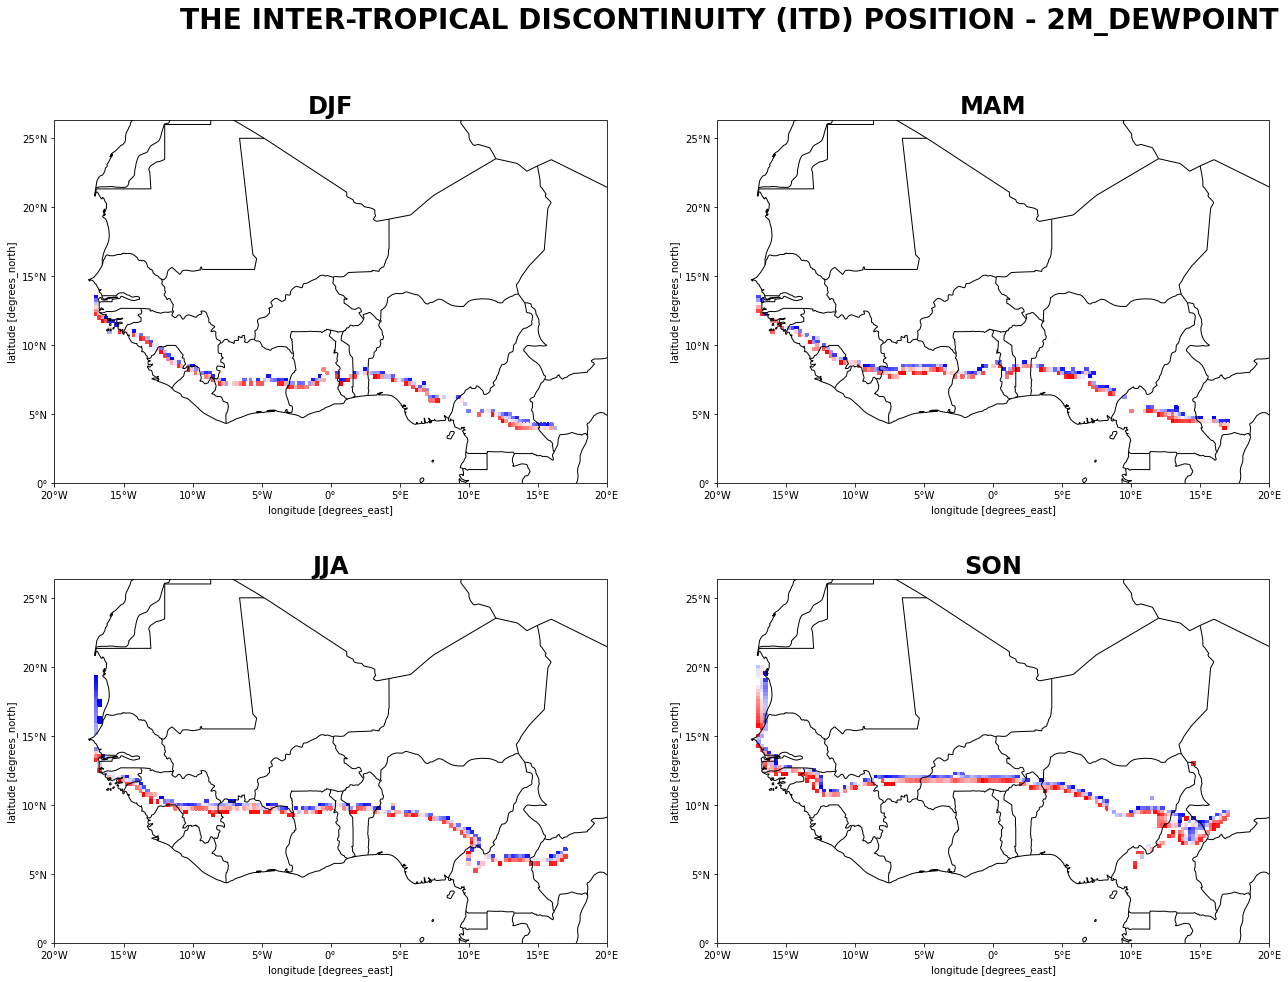

In [83]:
fig, axes = plt.subplots(nrows=2, ncols=2, subplot_kw = dict(projection = ccrs.PlateCarree()), figsize=(25,18), sharex = False)
plt.subplots_adjust(bottom=0.25, right=0.8, top=0.9)
for axis in axes:
    for ax in axis:
        ax.coastlines()
        ax.add_feature(cf.BORDERS)
        ax.set_extent([-20, 20, 0,25])
        ax.set_xticks([-20,-15,-10,-5,0,5,10,15,20])
        ax.set_yticks([25,20,15,10,5,0], crs=ccrs.PlateCarree())
    
        lon_formatter = LongitudeFormatter()
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        
fig.suptitle('THE INTER-TROPICAL DISCONTINUITY (ITD) POSITION - 2M_DEWPOINT', fontsize =28, fontweight = 'bold')        
        
djf.plot(cmap='bwr', ax = axes[0,0], add_colorbar = False)#, 
axes[0,0].set_title('DJF' ,fontweight = 'bold', fontsize =24)
########################################
mam.plot(cmap='bwr', ax = axes[0,1],add_colorbar = False)#, 
axes[0,1].set_title('MAM' ,fontweight = 'bold', fontsize =24)
#######################################
jja.plot(cmap='bwr', ax = axes[1,0], add_colorbar = False)#, 
axes[1,0].set_title('JJA' ,fontweight = 'bold', fontsize =24)
#######################################
son.plot(cmap='bwr', ax = axes[1,1], add_colorbar = False)#, 
axes[1,1].set_title('SON' ,fontweight = 'bold', fontsize =24)
#######################################
#for ax in axes.flat:
    #ax.label_outer()

plt.savefig('ITD_DP-SEASON.pdf')
plt.savefig('ITD_DP-SEASON.jpg')

In [ ]:
sea_RH.r.season.DJF.plot()

In [ ]:
#ds = xr.combine_by_coords([ds1,ds2,ds3, ds4, ds5,ds6], compat='no_conflicts')